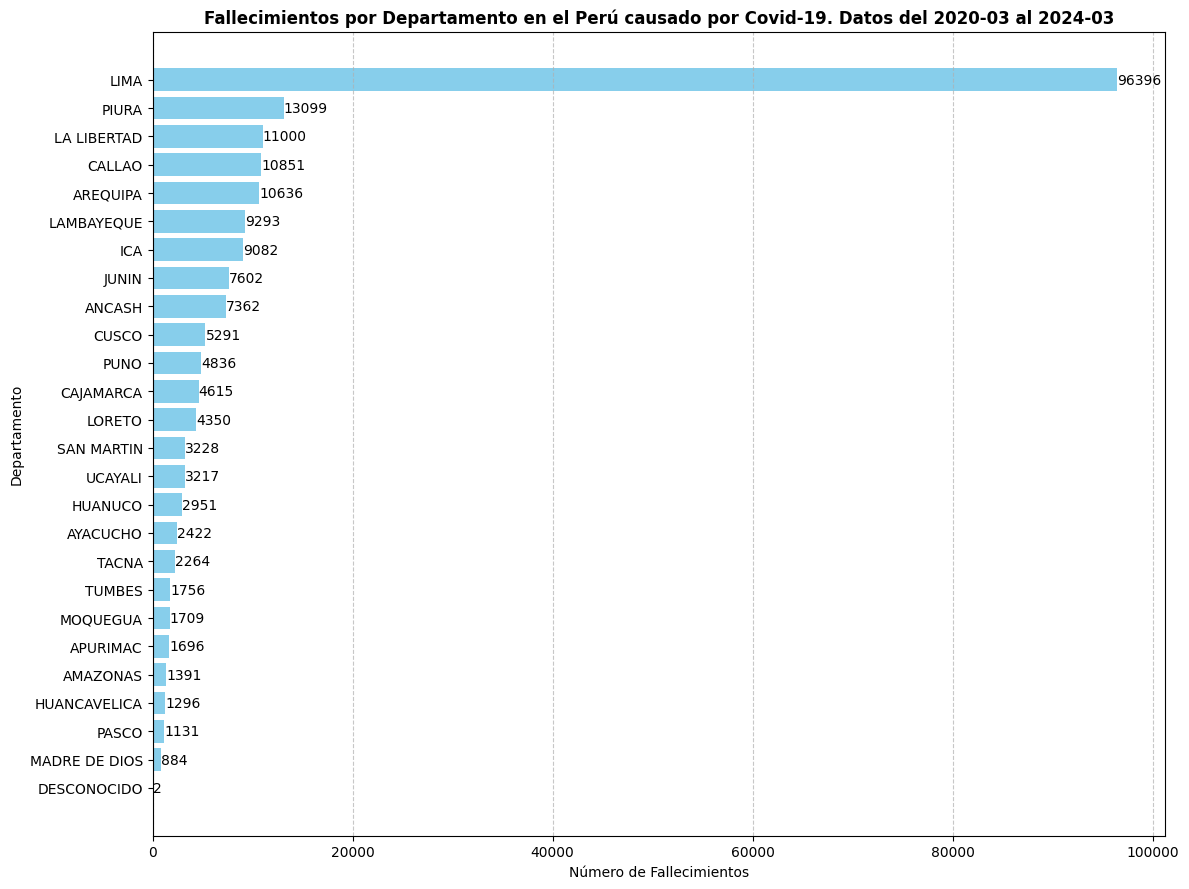

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

url_fallecidos = 'https://github.com/SergioGerman412/30DayChartChallenge/raw/main/Day2-Neo/fallecidos_covid.csv'
data_fallecidos = pd.read_csv(url_fallecidos, delimiter=';')

# Eliminar filas duplicadas basadas en 'UUID' ya que una persona no puede fallecer 2 veces (error)
data_fallecidos = data_fallecidos.drop_duplicates(subset='UUID')

# Reemplazar datos anómalos
data_fallecidos['DEPARTAMENTO'] = data_fallecidos['DEPARTAMENTO'].replace('MASCULINO', 'DESCONOCIDO')
data_fallecidos['DEPARTAMENTO'] = data_fallecidos['DEPARTAMENTO'].replace('LIMA METROPOLITANA', 'LIMA')


fallecimientos_por_departamento = data_fallecidos.groupby('DEPARTAMENTO')['UUID'].count().reset_index()
fallecimientos_por_departamento = fallecimientos_por_departamento.rename(columns={'UUID': 'Fallecimientos'})
fallecimientos_por_departamento = fallecimientos_por_departamento.sort_values(by='Fallecimientos', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 9))
bars = plt.barh(fallecimientos_por_departamento['DEPARTAMENTO'], fallecimientos_por_departamento['Fallecimientos'], color='skyblue')
plt.xlabel('Número de Fallecimientos')
plt.ylabel('Departamento')
plt.title('Fallecimientos por Departamento en el Perú causado por Covid-19. Datos del 2020-03 al 2024-03', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar, value in zip(bars, fallecimientos_por_departamento['Fallecimientos']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{value}', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()



In [28]:

# Cargar los datos de fallecidos desde el archivo CSV
url_fallecidos = 'https://github.com/SergioGerman412/30DayChartChallenge/raw/main/Day2-Neo/fallecidos_covid.csv'
data_fallecidos = pd.read_csv(url_fallecidos, delimiter=';')

data_fallecidos["DEPARTAMENTO"].unique()

array(['TUMBES', 'TACNA', 'PIURA', 'PUNO', 'UCAYALI', 'SAN MARTIN',
       'LIMA', 'CUSCO', 'CAJAMARCA', 'AREQUIPA', 'LA LIBERTAD',
       'AMAZONAS', 'LORETO', 'MOQUEGUA', 'MADRE DE DIOS', 'LAMBAYEQUE',
       'APURIMAC', 'PASCO', 'ICA', 'HUANUCO', 'ANCASH', 'JUNIN', 'CALLAO',
       'AYACUCHO', 'HUANCAVELICA', 'LIMA METROPOLITANA', 'MASCULINO'],
      dtype=object)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c970ac1ee8d697d4f14adbdf9a3a12b0b7d67db2d8afe4fb6ed60c615e8dca40
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


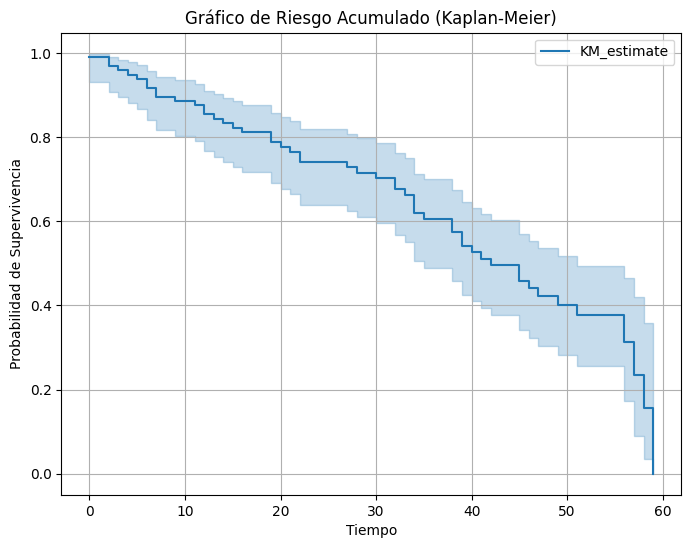

In [19]:
!pip install lifelines

import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Datos de ejemplo
np.random.seed(123)
tiempos = np.random.randint(0, 60, size=100)  # Tiempos de eventos
eventos = np.random.randint(0, 2, size=100)    # Evento: 1 si ocurrió el evento, 0 si no

data = pd.DataFrame({'tiempo': tiempos, 'evento': eventos})

# Crear el objeto KaplanMeierFitter
kmf = KaplanMeierFitter()

# Ajustar los datos al objeto KaplanMeierFitter
kmf.fit(data['tiempo'], event_observed=data['evento'])

# Crear el gráfico de riesgo acumulado
plt.figure(figsize=(8, 6))
kmf.plot()
plt.title('Gráfico de Riesgo Acumulado (Kaplan-Meier)')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de Supervivencia')
plt.grid(True)
plt.show()
